In [1]:
from __future__ import print_function
import morphs

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

from morphs.plot import cumulative_distribution as plt_cum_dist

/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
folder = morphs.paths.FIGURES_DIR / "neurometrics"

In [3]:
for path in morphs.paths.NEUROMETRIC_NULL_DIR.glob("*.pkl"):
    num_shuffles = morphs.data.parse.num_shuffles(path)
    print(num_shuffles, path.name)

8 neurometric_null_dist_8.pkl
64 neurometric_null_dist_64.pkl
1024 neurometric_null_dist_1024.pkl
2048 neurometric_null_dist_2048.pkl


In [4]:
# For plotting purposes, don't plot too many
# use 64 or max if less
if num_shuffles > 64:
    num_shuffles = 64

In [5]:
all_samples_df = morphs.load.neurometric_null_all(num_shuffles)

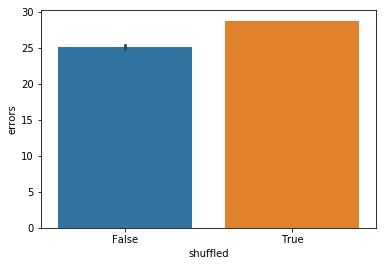

In [6]:
ax = sns.barplot(x="shuffled", y="errors", data=all_samples_df)

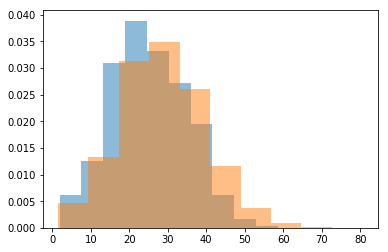

In [7]:
for shuffled, shuffled_group in all_samples_df.groupby("shuffled"):
    plt.hist(shuffled_group["errors"].values, alpha=0.5, density=True)

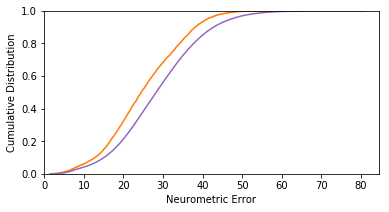

In [8]:
colors = sns.color_palette()[1::3]
fig = plt.figure(figsize=(6, 3))
ax = plt.gca()
for i, (shuffled, shuffled_group) in enumerate(all_samples_df.groupby("shuffled")):
    plt_cum_dist(
        shuffled_group["errors"].values,
        scaled=True,
        label="shuffled" if shuffled else "unshuffled",
        color=colors[i],
    )
ax.set_ylim(0, 1)
ax.set_xlim(0, ax.get_xlim()[-1])
ax.set_ylabel("Cumulative Distribution")
ax.set_xlabel("Neurometric Error")
# ax.legend(loc="lower right")
morphs.plot.savefig(fig, "neurometric-null-all", folder=folder)

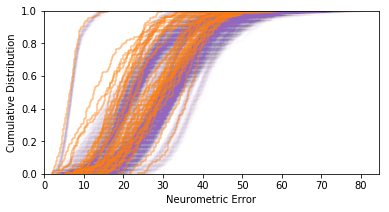

In [9]:
fig = plt.figure(figsize=(6, 3))
ax = plt.gca()
for i, (shuffled, shuffled_group) in enumerate(all_samples_df.groupby("shuffled")):
    color = colors[i]
    label = "shuffled" if shuffled else "unshuffled"
    alpha = 0.01 if shuffled else 0.5
    zorder = 1 if shuffled else 2
    for (shuffle_index, block), group in shuffled_group.groupby(
        ["shuffle_index", "block"]
    ):
        plt_cum_dist(
            group["errors"].values,
            scaled=True,
            label=label,
            color=color,
            alpha=alpha,
            zorder=zorder,
        )
ax.set_ylim(0, 1)
ax.set_xlim(0, ax.get_xlim()[-1])
ax.set_ylabel("Cumulative Distribution")
ax.set_xlabel("Neurometric Error")
morphs.plot.savefig(fig, "neurometric-null-pop", folder=folder)